# 1. Introduction to Time Series

This classes are based on [Avishek Pal, PKS Prakash (2017). Practical time series analysis: master time series data processing[...]](https://universidadefe957-my.sharepoint.com/:b:/g/personal/paulo_firmino_ufca_edu_br/EY6upDI8ktJKnCQlqns9kz4BhFko1dcOehhwcyw7JE4JuQ?e=WMhXbd). The codes of the book can be found [here](https://github.com/PacktPublishing/Practical-Time-Series-Analysis/tree/master/.)

## General Imports

In [69]:
#IMPORT
from __future__ import print_function#to enable using print as a function for readers who might be using a 2.x version of Python
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## The dataset

The dataset of the example on military expenditures and national debt of countries has been downloaded from the Open Data Catalog of World Bank. [Here](https://github.com/tidyverts/tsibbledata/blob/master/data-raw/world_bank/WDIData.csv) you have the link for the raw data.

In [70]:
#READING DATA
#
# os.chdir('D:\Practical Time Series')
data = pd.read_csv('..\..\data\TimeSeries\WDIData.csv')
display(data)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,X64
0,Arab World,ARB,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.023955e+01,5.523280e+01,5.651527e+01,5.458942e+01,5.093226e+01,4.392220e+01,4.090533e+01,4.361830e+01,NaN,NaN
2,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.109932e+12,2.501739e+12,2.786787e+12,2.866861e+12,2.908394e+12,2.560754e+12,2.513936e+12,2.586311e+12,NaN,NaN
3,Arab World,ARB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.749403e+00,3.608109e+00,6.695718e+00,3.135112e+00,2.452966e+00,3.342473e+00,3.242399e+00,9.767830e-01,NaN,NaN
4,Arab World,ARB,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.845191e+01,3.712032e+01,3.776751e+01,3.974127e+01,4.218054e+01,4.490049e+01,4.171982e+01,4.056287e+01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,Zimbabwe,ZWE,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.964090e+01,3.480080e+01,2.516325e+01,2.198776e+01,2.093015e+01,1.916018e+01,1.994353e+01,1.965802e+01,NaN,NaN
1580,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1.052990e+09,1.096647e+09,1.117602e+09,1.159512e+09,1.217138e+09,1.311436e+09,...,1.204166e+10,1.410192e+10,1.711485e+10,1.909102e+10,1.949552e+10,1.996312e+10,2.054868e+10,2.204090e+10,NaN,NaN
1581,Zimbabwe,ZWE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,6.316157e+00,1.434471e+00,6.244345e+00,-1.106172e+00,4.910571e+00,...,1.967532e+01,1.419391e+01,1.666543e+01,1.989493e+00,2.376929e+00,1.779873e+00,7.558693e-01,4.704035e+00,NaN,NaN
1582,Zimbabwe,ZWE,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.348330e+01,5.466573e+01,4.899928e+01,3.666874e+01,3.374147e+01,3.758864e+01,3.127549e+01,3.037027e+01,NaN,NaN


In [71]:
print('** Column names:', data.columns)
print('** No. of rows, columns:', data.shape)

** Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'X64'],
      dtype='object')
** No. of rows, columns: (1584, 64)


In [72]:
nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Unique number of countries: 264


In [73]:
data['Indicator Name'].unique()

array(['Consumer price index (2010 = 100)',
       'Exports of goods and services (% of GDP)', 'GDP (current US$)',
       'GDP growth (annual %)',
       'Imports of goods and services (% of GDP)', 'Population, total'],
      dtype=object)

## Different types of data

### Cross-sectional data

Cross-sectional data or cross-section of a population is obtained by taking observations from multiple individuals at the same point in time.

In [74]:
x1Nm = 'Exports of goods and services (% of GDP)'
x2Nm = 'Imports of goods and services (% of GDP)'
x1 = data[data['Indicator Name'] == x1Nm]#'Central government debt, total (% of GDP)']
x2 = data[data['Indicator Name']==x2Nm]#'Military expenditure (% of GDP)']

In [75]:
print('********* x1-'+x1Nm+' *********')
display(x1.head(3))
print('********* x2-'+x2Nm+' *********')
display(x2.head(3))

********* x1-Exports of goods and services (% of GDP) *********


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,X64
1,Arab World,ARB,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,50.239550,55.232799,56.515274,54.589424,50.932260,43.922196,40.905334,43.618299,NaN,NaN
7,Caribbean small states,CSS,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Central Europe and the Baltics,CEB,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,52.340289,56.973057,59.334503,60.829467,62.436532,63.171430,63.981945,65.536751,NaN,NaN


********* x2-Imports of goods and services (% of GDP) *********


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,X64
4,Arab World,ARB,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.451907,37.120323,37.767513,39.741270,42.180541,44.900487,41.719823,40.562872,NaN,NaN
10,Caribbean small states,CSS,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Central Europe and the Baltics,CEB,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,53.084750,57.353974,58.504029,58.143451,59.732155,59.757136,59.511305,61.542290,NaN,NaN


In [76]:
print('Shape of x1:', x1.shape)
print('Shape of x2:', x2.shape)

Shape of x1: (264, 64)
Shape of x2: (264, 64)


In [77]:
#MISSING STUDY
print('********* x1.info() **********')
display(pd.DataFrame(x1.info()));
print('********* x2.info() **********')
display(pd.DataFrame(x2.info()));
# print('********* x1.isna ********* \n', x1.isna().sum())

********* x1.info() **********
<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 1 to 1579
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            114 non-null    float64
 5   1961            115 non-null    float64
 6   1962            116 non-null    float64
 7   1963            116 non-null    float64
 8   1964            117 non-null    float64
 9   1965            123 non-null    float64
 10  1966            124 non-null    float64
 11  1967            129 non-null    float64
 12  1968            131 non-null    float64
 13  1969            131 non-null    float64
 14  1970            138 non-null    float64
 15  1971            138 non-null    float64
 16  1972            139 non-null    float64
 17  1973    

""


********* x2.info() **********
<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 4 to 1582
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            115 non-null    float64
 5   1961            115 non-null    float64
 6   1962            116 non-null    float64
 7   1963            117 non-null    float64
 8   1964            118 non-null    float64
 9   1965            124 non-null    float64
 10  1966            125 non-null    float64
 11  1967            130 non-null    float64
 12  1968            132 non-null    float64
 13  1969            132 non-null    float64
 14  1970            139 non-null    float64
 15  1971            138 non-null    float64
 16  1972            139 non-null    float64
 17  1973    

""


In [78]:
x1.index = x1['Country Name']#['Country Code']
x2.index = x2['Country Name']

In [79]:
def getYearWithMaxNotNullValues():
    bestYear = '--'
    x1_max = -1
    x2_max = -1
    for year in data.columns[4:len(data.columns)]:
        # year = '1990'
        x1_notNullCount = len(x1[year]) - x1[year].isnull().sum()
        x2_notNullCount = len(x2[year]) - x2[year].isnull().sum()
        if x1_notNullCount > x1_max and x2_notNullCount > x2_max:
            x1_max = x1_notNullCount
            x2_max = x2_notNullCount
            bestYear = year
            # print('--- best year:', year)
            # print('cp_notNullCount:', cp_notNullCount)
            # print('gdp_notNullCount:', gdp_notNullCount)
    print('--- (best year, x1_max, x2_max:', bestYear, x1_max, x2_max)
    return bestYear
year = getYearWithMaxNotNullValues()

--- (best year, x1_max, x2_max: 2013 240 240


In [80]:
# year = '1960'
print('********* x1-'+x1Nm+' *********')
display(pd.DataFrame(x1[year].describe()))
print('********* x2-'+x2Nm+' *********')
display(pd.DataFrame(x2[year].describe()))

********* x1-Exports of goods and services (% of GDP) *********


,2013
count,240.000000
mean,42.737094
std,28.778535
min,8.501051
25%,25.736665
50%,33.654320
75%,51.653258
max,221.610060


********* x2-Imports of goods and services (% of GDP) *********


,2013
count,240.000000
mean,48.176249
std,26.440211
min,12.998953
25%,30.009453
50%,39.761499
75%,60.672073
max,221.009959


In [81]:
x1_year = x1[year][~pd.isnull(x1[year])]
print('*** x1_year:', len(x1_year))
x2_year = x2[year][~pd.isnull(x2[year])]
print('*** x2_year:', len(x2_year))
data_to_plot = pd.concat([x1_year, x2_year], axis=1)
data_to_plot.columns = [x1Nm, x2Nm]
data_to_plot.head()

*** x1_year: 240
*** x2_year: 240


,Exports of goods and services (% of GDP),Imports of goods and services (% of GDP)
Country Name,,
Arab World,54.589424,39.741270
Central Europe and the Baltics,60.829467,58.143451
Early-demographic dividend,28.257919,29.315987
East Asia & Pacific,32.165212,31.025910
East Asia & Pacific (excluding high income),28.997155,26.906974


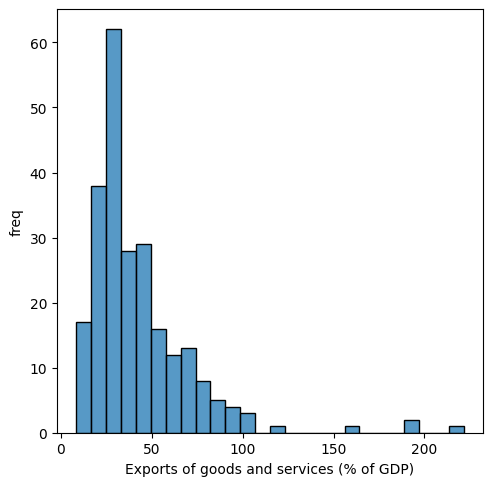

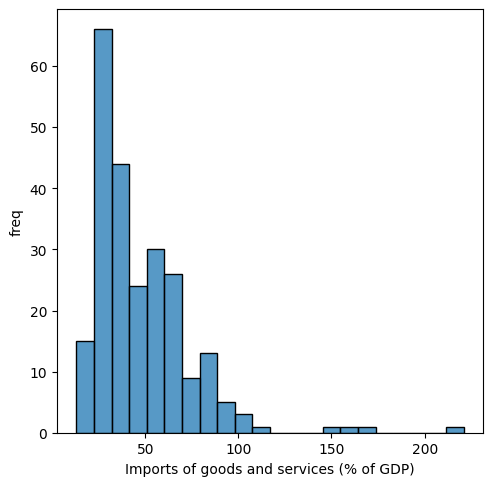

In [82]:
def histPlot(varNm):
    # data_to_plot = data_to_plot.ix[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]
    plt.figure(figsize=(5.5, 5.5))
    g = sns.histplot(np.array(data_to_plot[varNm]));#, hue_norm=False)
    # g.set_title('GDP growth of 85 countries in year');
    g.set_xlabel(varNm);
    g.set_ylabel('freq');
histPlot(x1Nm)
histPlot(x2Nm)

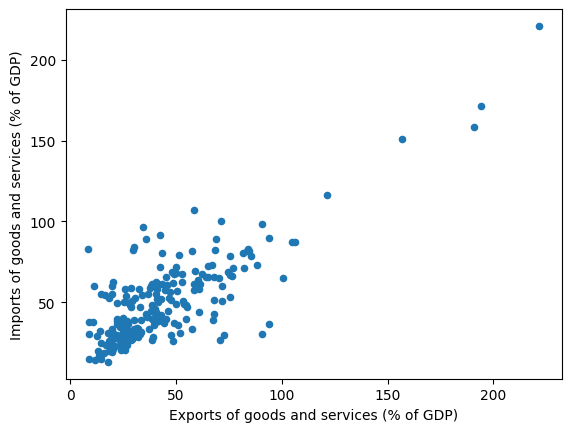

In [83]:
data_to_plot.plot(x=x1Nm, y=x2Nm, kind='scatter');

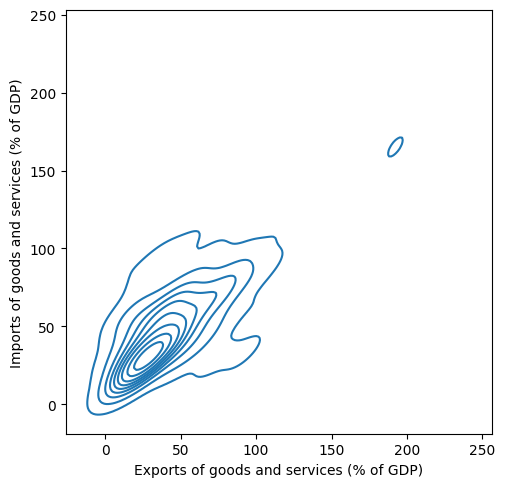

In [84]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data = data_to_plot,
                x = x1Nm,
                y = x2Nm);
# g.set_title('Military expenditures & Debt of central governments in 2010')

### Time series data

The example of cross-sectional data discussed earlier is from a given year only. However,
instead if we consider only one country, for example United States, and take a look at its
military expenses and central government debt for a span of 10 years from 2001 to 2010, that
would get two time series - one about the US federal military expenditure and the other
about debt of US federal government

In [85]:
yearsCols = x1.columns.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'X64'])

In [86]:
# x1['Country Code'].unique()
display(x1['Country Name'].nunique())
x1['Country Name'][x1['Country Code']=='BRA']

264

Country Name
Brazil    Brazil
Name: Country Name, dtype: object

In [87]:
country = 'BRA'
x1Country = x1.loc[x1['Country Code']==country, yearsCols].T
x2Country = x2.loc[x2['Country Code']==country, yearsCols].T
country_data = pd.concat([x1Country, x2Country], axis=1)
country_data.columns = [x1Nm, x2Nm]
display(country_data.head(2))

,Exports of goods and services (% of GDP),Imports of goods and services (% of GDP)
1960,7.059046,7.117286
1961,7.279408,7.339459


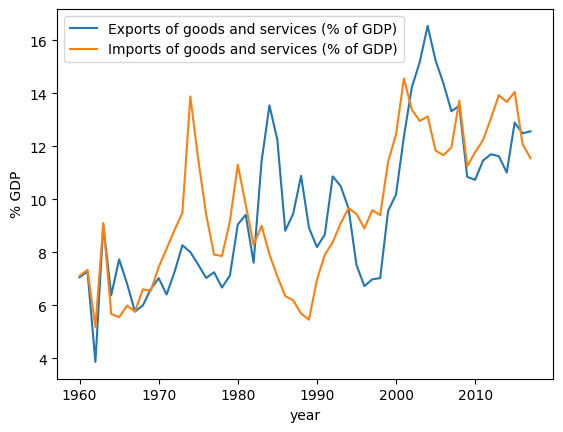

In [88]:
country_data.plot(xlabel='year', ylabel='% GDP');

### Panel data

So far, we have seen data taken from multiple individuals but at one point in time (crosssectional) or taken from an individual entity but over multiple points in time (time series).
However, if we observe multiple entities over multiple points in time we get a panel data
also known as longitudinal data.

In [89]:
def getCountriesPanelData(countriesCodes):
    df = pd.DataFrame(index=yearsCols)
    for countryCd in countriesCodes:
        df = pd.concat([df, x1.loc[x1['Country Code']==countryCd, yearsCols].T],
                       axis=1)
    df.index.name = 'Year' 
    display(df.head(2))
    return df
countries_data = getCountriesPanelData(countriesCodes = ['BRA', 'CHN', 'USA'])

,Brazil,China,United States
Year,,,
1960,7.059046,4.305830,4.969630
1961,7.279408,3.870811,4.899698


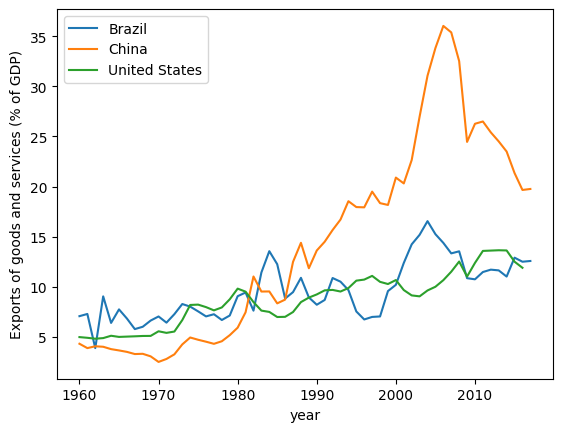

In [90]:
countries_data.plot(xlabel='year', ylabel=x1Nm);